# <div style="color:#fff;display:fill;border-radius:10px;background-color:#004F98;text-align:center;letter-spacing:0.1px;overflow:hidden;padding:20px;color:white;overflow:hidden;margin:0;font-size:100%">Data Wrangling</div>

## Import Libraries

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Read Data

In [10]:
dataset = pd.read_csv('uber-raw-data-sep14.csv')
df = dataset.copy()
df.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [12]:
## ==> Preprocessing Step
df["Date/Time"] = df["Date/Time"].map(pd.to_datetime) 

In [13]:
df["Day"] = df["Date/Time"].apply(lambda x: x.day)
df["Weekday"] = df["Date/Time"].apply(lambda x: x.weekday())
df["Hour"] = df["Date/Time"].apply(lambda x: x.hour)

## Descriptive statistics


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   Date/Time  1028136 non-null  datetime64[ns]
 1   Lat        1028136 non-null  float64       
 2   Lon        1028136 non-null  float64       
 3   Base       1028136 non-null  object        
 4   Day        1028136 non-null  int64         
 5   Weekday    1028136 non-null  int64         
 6   Hour       1028136 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 54.9+ MB


In [15]:
df.describe()

,Lat,Lon,Day,Weekday,Hour
count,1.028136e+06,1.028136e+06,1.028136e+06,1.028136e+06,1.028136e+06
mean,4.073922e+01,-7.397182e+01,1.555385e+01,2.961477e+00,1.409235e+01
std,4.082861e-02,5.831413e-02,8.448335e+00,1.942572e+00,5.971244e+00
min,3.998970e+01,-7.477360e+01,1.000000e+00,0.000000e+00,0.000000e+00
25%,4.072040e+01,-7.399620e+01,8.000000e+00,1.000000e+00,1.000000e+01
50%,4.074180e+01,-7.398310e+01,1.600000e+01,3.000000e+00,1.500000e+01
75%,4.076120e+01,-7.396280e+01,2.300000e+01,5.000000e+00,1.900000e+01
max,4.134760e+01,-7.271630e+01,3.000000e+01,6.000000e+00,2.300000e+01


In [16]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
Day                   int64
Weekday               int64
Hour                  int64
dtype: object

In [17]:
df['Base'] = df['Base'].astype('category')

In [18]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base               category
Day                   int64
Weekday               int64
Hour                  int64
dtype: object

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Day', ylabel='Density'>

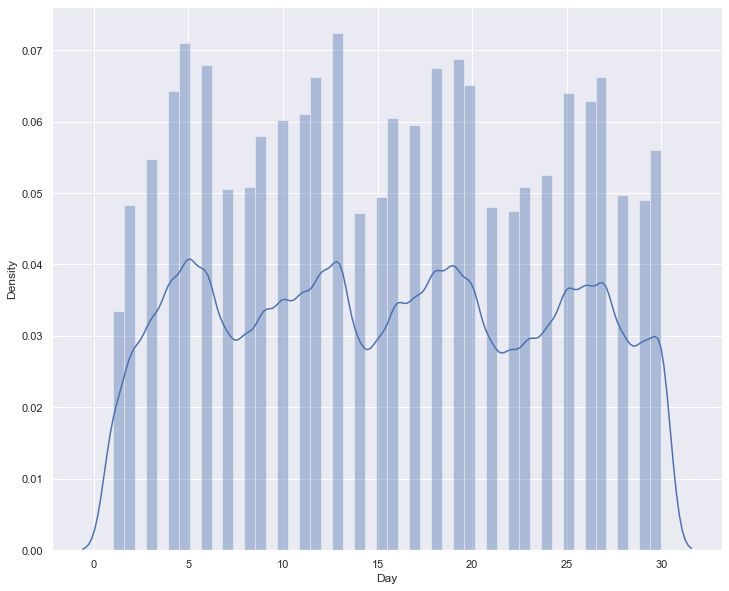

In [21]:
sns.set(rc={'figure.figsize':(12, 10)})
sns.distplot(df["Day"])

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hour', ylabel='Density'>

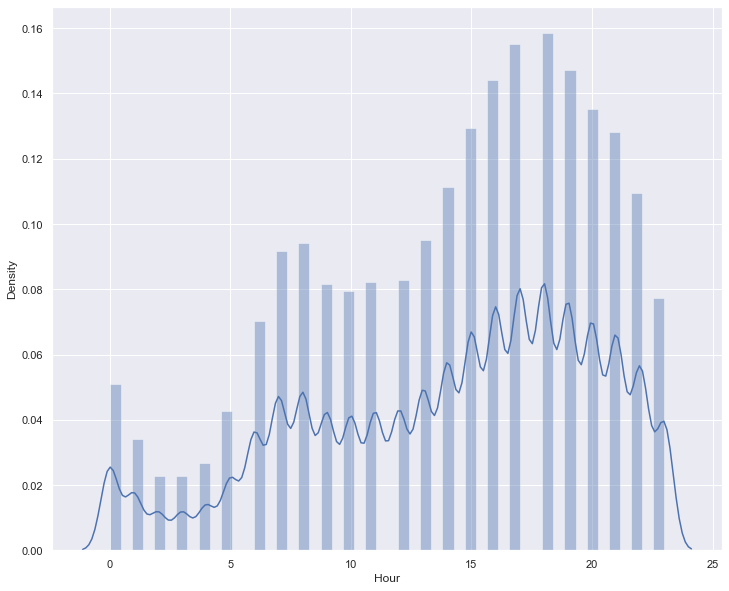

In [25]:
sns.distplot(df['Hour'])

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weekday', ylabel='Density'>

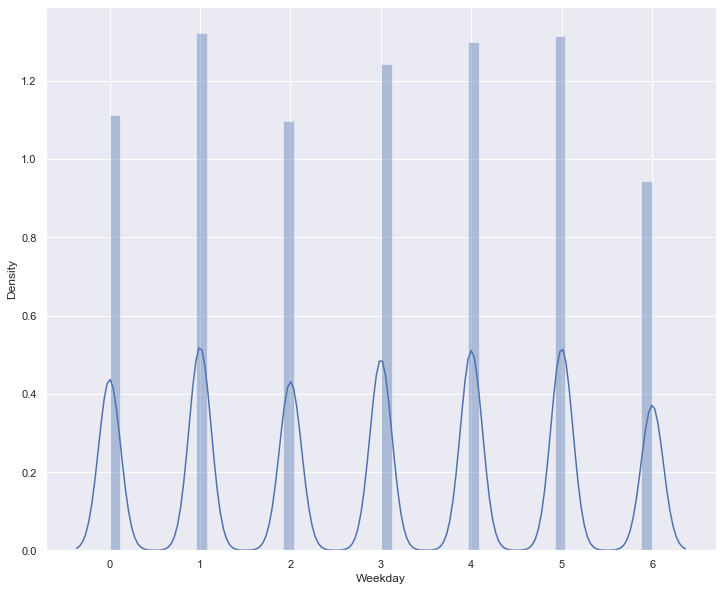

In [26]:
sns.distplot(df["Weekday"])

<AxesSubplot:xlabel='Hour', ylabel='Weekday'>

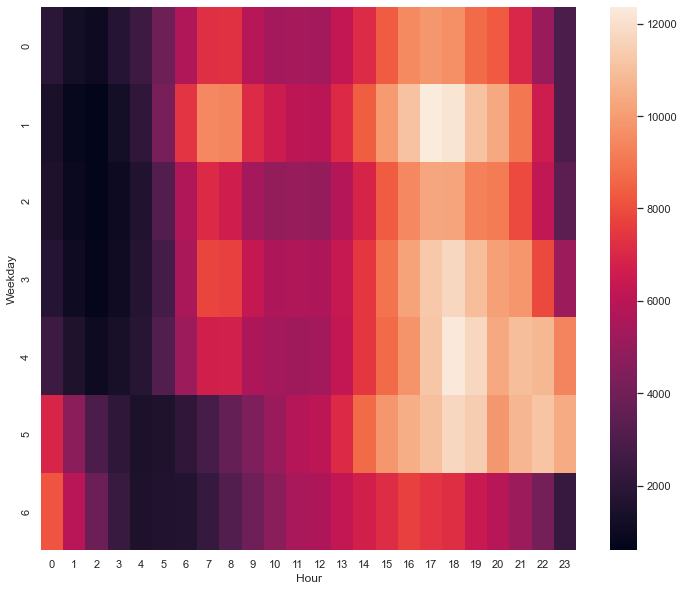

In [27]:
# Correlation of Weekday and Hour
df = df.groupby(["Weekday", "Hour"]).apply(lambda x: len(x))
df = df.unstack()
sns.heatmap(df, annot=False)

# Summary

## So this is how we can analyze the Uber trips for New York City. Some of the conclusions that I got from this analysis are:

> Monday is the most profitable day for Uber

> On Saturdays less number of people use Uber

> 6 pm is the busiest day for Uber

> On average a rise in Uber trips start around 5 am.

> Most of the Uber trips originate near the Manhattan region in New York.

### I hope you liked this article on Uber trips analysis using Python. Feel free to ask your valuable questions in the comments section below.